In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

$$\newcommand{\nr}[1]{\|#1\|}
\newcommand{\Rsp}{\mathbb{R}}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\N}{\mathbb{N}}
$$
### Cours accéléré analyse numérique - M2 AMS - 2023/24

# Méthode des éléments finis pour les EDP.


## I - Principe de la méthode des éléments finis.

La méthode des éléments finis est une méthode de discrétisation des EDP adaptée aux problèmes qui peuvent se poser sous une forme dite variationnelle, qui est le plus souvent de la forme
$$
(P)\ \ \ u\in H\ \ \textrm{tel que}\ \ a(u,v)=l(v),\ \forall\ v\in H,
$$

où $H$ est un espace de Hilbert, $a$ une application bilinéaire sur $H$ et $l$ une forme linéaire sur $H$. Si l'application bilinéaire $a$ est continue et coercive et si la  forme linéaire $l$ est continue, le problème $(P)$ admet une unique solution dans $H$ (c'est le résultat du théorème de Lax-Milgram, ou de Riesz si $a$ est en plus symétrique).

Les méthodes que l'on verra aujourd'hui se basent non plus sur la discrétisation de l'EDP elle même, comme c'est le cas pour la méthode des différences finies, mais sur la discrétisation de la formulation variationelle $(P)$ de l'équation.

Dans ce cadre fonctionnel, la discrétisation de $(P)$ consiste à remplacer $H$ par un sous-espace de dimension finie $H_N$ (de dimension $N\in\N$ *grande*) et à chercher une solution approchée $u_N$ de $(P)$ dans $H_N$ vérifiant

$$
(P_N)\ \ \ u_N\in H_N\ \ \textrm{tel que}\ \ a(u_N,v_N)=l(v_N),\ \forall\ v_N\in H_N.
$$

Sous les mêmes hypothèses sur $a$ et sur $l$ le problème $(P_N)$ admet une unique solution $u_N$ dans $H_N$ (car $H_N$ étant de dimension finie, c'est un sous-espace fermé de $H$ donc aussi un espace d'Hilbert). 

Cette procédure est le principe de la méthode de Galerkin.

Comme l'espace $H_N$ est de dimension finie $N$, si on se donne une base $(w_1,\dots,w_N)$ de $H_N$, le problème $(P_N)$ est équivalent au problème

$$
(\overline{P_N})\ \ \ u_N\in H_N\ \ \textrm{tel que}\ \ a(u_N,w_i)=l(w_i),\ \forall\ i=1,\dots,N.
$$

La méthode des éléments finis correspond à une façon de choisir les espaces d'approximation $H_N$, et les respectives bases, pour la méthode de Galerkin. Ici on va présenter un certain type d'éléments finis, dits de Lagrange.

On va présenter cette méthode dans le cas du problème modèle de l'équation de Poisson, d'abord en dimension 1 d'espace, puis en dimension 2.

## II - Approximation d'un problème aux limites pour une équation elliptique 1D avec conditions aux limites de Dirichlet homogènes.

L'exemple type que l'on considère est le problème aux limites suivant posé dans un intervalle bornée $]a,b[$ de $\RR$, avec conditions aux limites de Dirichlet homogènes sur le bord :

$$
(P)\left\{\begin{aligned}
&-u''(x)+cu(x)=f(x),\ x\in ]a,b[,\\
&u(a)=u(b)=0,
\end{aligned}
\right.
$$

où $f:[a,b]\longrightarrow\mathbb{R}$ est une fonction de classe $\mathcal{C}^2$ donnée et $c>0$. Dans ces conditions, on peut montrer que le problème $(P)$ admet une unique solution de classe $C^2.$

On considère l'espace de Sobolev

$$ 
V:=H^1_0(]a,b[) = \left\{ v \in L^2(]a,b[)\,:\, v' \in L^2(]a,b[),\ 
v(a)=v(b)=0 \right\},
$$

muni de la norme $\|v\|_V =\big(\|v\|^2_{L^2(]a,b[)}+\|v'\|^2_{L^2(]a,b[)}\big)^\frac12.$


La formulation variationnelle du problème $(P)$ s'écrit

\begin{equation*}
(Pv)\ \ \ 
\begin{cases}
u\in V  \,\textrm{tel que}\\
a(u,v)=L(v),\ \,\forall\ v\in V ,
\end{cases}
\end{equation*}

avec

$$
a(v,u)=\int_a^bu'(x)v'(x)dx+\int_a^bcu(x)v(x)dx,\ \ \ \ \ L(v)=\int_a^bf(x)v(x)dx.
$$

On peut montrer que $a$ est une aplication bilinéaire continue et coercive sur $V\times V$ et que $L$ est une aplication linéaire continue sur $V,$ et appliquer le théorème de Lax-Milgram pour conclure que $(Pv)$ admet une et une seule solution. 

L'idée de la méthode de Galerkin est donc de chercher une solution approchée de $(Pv)$ dans un sous-espace vectoriel de dimension finie $N\in\mathbb{N}$, que l'on note $V^N.$ Autrement dit, on cherche $u^N\in V^N$ tel que
$$
(P_Nv)\ \ \ \ \ \ \ \ \ a(u^N,v^N)=L(v^N),\ \,\forall\ v^N\in V^N. 
$$

**Question 1.** Soit $(\phi_1,\dots,\phi_N)$ une base de $V^N.$ Montrer que $u^N=\displaystyle{\sum_{i=1}^N u_i\phi_i}$ est solution de $(P_Nv)$ si et seulement si le vecteur $U=(u_1,\dots,u_N)^T$ est solution d'un système linéaire 

$$
MU+KU=F,
$$

où $M$ et $K$ sont des matrices de $\mathcal{M}_N(\mathbb{R})$ et $F$ un vecteur de $\mathbb{R}^n$ que l'on explicitera. La matrice $M$ s'appelle matrice de masse et la matrice $K$ s'appelle matrice de rigidité.

**Question 2.** Montrer le **lemme de Cea** :

Soit $u$ la solution du problème $(Pv)$ et $u^N$ la solution de $(P_Nv)$. Si $a$ est continue, de constante de continuité M, et coercive, de constante de coercivité $\alpha$, alors

$$
\|u-u^N\|_H\leq\frac{M}{\alpha}\inf_{v^N\in V^N}\|u-v^N\|_H=d(u,V^N).
$$

### La méthode des éléments finis de Lagrange $P^1$ : choix de l'espace $V^N$.

On commence par discrétiser l'intervalle $]a,b[$ en $N+1$ sous-intervalles $]x_i,x_{i+1}[,\ i=0,\dots,N,$ où $x_i=a+ih,\ i=0,\dots,N+1,$ avec $h=\frac{b-a}{N+1}$ le pas de la discrétisation. Les points $x_i$ sont les *noeuds* de la discrétisation et on dit qu'on a construit un *maillage* du domaine $]a,b[$.

Le principe de la méthode des éléments finis de Lagrange $P_k$ consiste à considérer $V^N$ le sous-espace que de $V$  que l'on notera désormais $V_h$ des fonctions continues, polynômes de degré $k$ dans les intervalles $[x_i,x_{i+1}].$ Ici on va considérer des éléments finis $P_1$, c'est-à-dire  

$$ 
V_h \ = \left \{ v_h \in C^0([a,b])\,\,:\,\ v_h\ \textrm{est affine sur } {[x_i,x_{i+1}]}  \textrm{ et } v_h(a)=v_h(b)=0 \right \} .
$$

L'espace $V_{h}$ est un sous-espace vectoriel de $V$, de dimension finie $N,$ dont une base est formée par les fonctions $\,\psi_{i}$, $i=1,...,N,\ $ définies par
$\psi_{i}(x_{j})=\delta_{i,j},$ soit 

$$
\psi_{i}(x)= 
\begin{cases}
\dfrac{x-x_{i-1}}{x_{i}-x_{i-1}},  &  \textrm{si } x_{i-1} \le  x \le  x_{i},  \\
\dfrac{x-x_{i+1}}{x_{i}-x_{i+1}},  &  \textrm{si } x_{i} \le  x \le x_{i+1},  \\
0,  &  \textrm{sinon.}  
\end{cases}
$$

Les fonctions $\psi_i$ sont appelées de *fonctions chapeau.*

**Question 2.** Calculer explicitement en fonction de $h$ les coefficients des matrices $M$ et $K$. Donner l'expression des coefficients $F_i$ du vecteur $F$ et calculer une valeur approchée de $F_i$ par la méthode des trapèzes. 

**Implémentation en python.**

**Question 3.**
Ecrire deux fonctions $K(n)$ et $M(n)$ calculant les matrices $K$ et $M$ de taille $n$. Ecrire une fonction $F(f,n)$ calculant une valeur approché du vecteur $F$ en utilisant la méthode des trapèzes. Ecrire ensuite un programme donnant la solution approchée $u_h$ de $(P_v)$ avec $]a,b[=]0,1[$, $c=1$ et dans les deux cas $f=-(1+e)$ et $f=(1+\pi^2)\sin(\pi x).$ 

Représenter, dans les deux cas, la solution approchée et la solution exacte, en utilisant une discrétisation associée à $N=199$. Pour cela, remarquer que

*i)* La solution de $(P)$ pour $f=-(1+e)$ est donnée par $u(x)=-(1+e)+e^x+e^{1-x} ;$

*ii)* La solution de $(P)$ pour $f=(1+\pi^2)\sin(\pi x)$ est donnée par $u(x)=\sin(\pi x).$

### Convergence de la méthode et étude de l'erreur de l'approximation.

**Question 4.** Soit, pour $v\in H^1_0$, $\Pi_h v$ l'intérpolé P1 de $v$ aux points $x_i$, c'est-à-dire la fonction de $V_h$ tel que $\Pi_h v(x_i)=v(x_i).$ Soit $u$ la solution du problème (P). Montrer que

$$
\|u-\Pi_h u\|_{H^1}\leq C h\|u''\|_{\infty}
$$

et que 

$$
\|u-\Pi_h u\|_{L^2}\leq C h^2\|u''\|_{L^2},
$$

où la constante $C$ ne dépend pas de $h$

Conclure que $u-u_h$ converge vers 0 en norme $L^2$ et en norme $H^1$.


**Question 5.** Soit $\Pi_h u=\displaystyle{\sum_{i=1}^N u(x_i)\psi_i}$ l'interpolé P1 de la solution exacte $u$ de $(P)$ aux points $x_i.$ Calculer, pour les valeurs de $h=49,\ 99,\ 199,\ 499,\ 999$ les normes $H^1$ et $L^2$ de l'erreur $u_h-\Pi_h u.$ Remarquer que cette norme peut se calculer en utilisant les matrices de masse et de rigidité. Représenter $u_h-\Pi_h u$ en fonction de $h$ en échélle logarithmique.


Text(0.5, 1.0, 'Erreur pour f=--$(1+\\pi^2)\\sin(\\pi x)$')

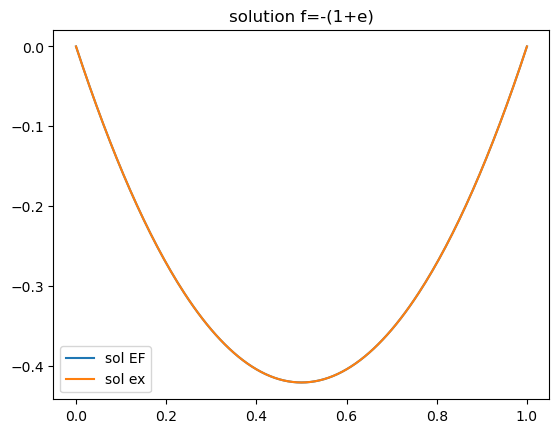

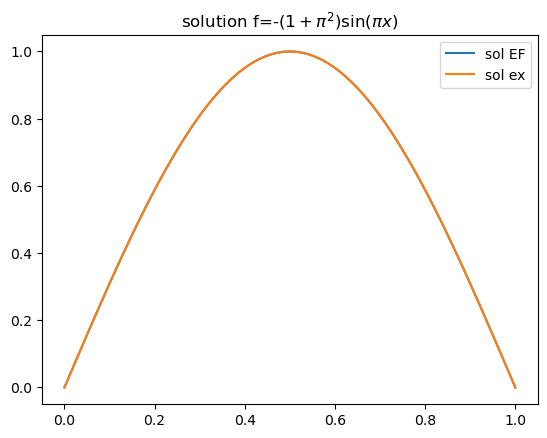

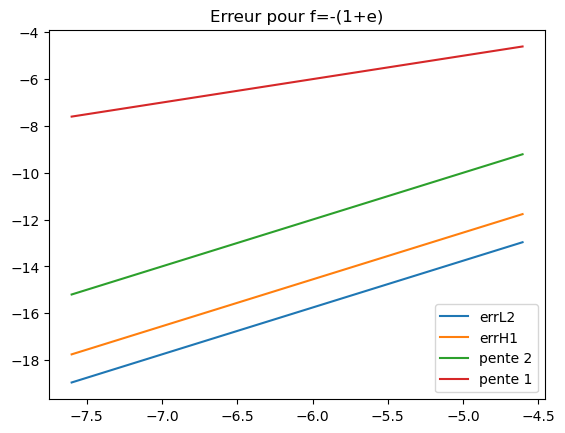

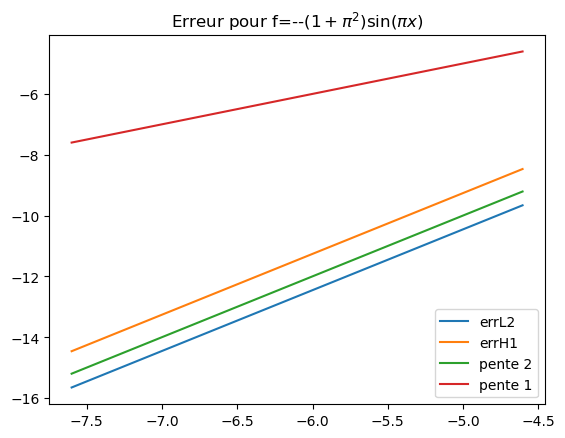

In [2]:


a=0
b=1

def f1(x):
    return -(1+np.exp(1))*np.ones(x.shape)
    
def uex1(x):
    return -(1+np.exp(1))+np.exp(x)+np.exp(1-x)

def f2(x):
    return (1+np.pi**2)*np.sin(np.pi*x)

def uex2(x):
    return np.sin(np.pi*x)

def M(n):
    h=(b-a)/(n+1)
    return (2*h/3)*np.eye(n)+(h/6)*np.eye(n,k=1)+(h/6)*np.eye(n,k=-1)

def K(n):
    h=(b-a)/(n+1)
    return (2/h)*np.eye(n)-(1/h)*np.eye(n,k=1)-(1/h)*np.eye(n,k=-1)

def F(f,n):
    h=(b-a)/(n+1)
    x=np.linspace(a+h,b-h,n)
    return h*f(x)

N=199
h=(b-a)/(N+1)

x=np.linspace(a,b,N+2)

A=K(N)+M(N)

F1=F(f1,N)
F2=F(f2,N)

u1=np.append(0,np.append(np.linalg.solve(A,F1),0))
u2=np.append(0,np.append(np.linalg.solve(A,F2),0))

plt.figure(1)
plt.plot(x,u1,label ='sol EF')
plt.plot(x,uex1(x),label='sol ex')
plt.legend()
plt.title('solution f=-(1+e)')

plt.figure(2)
plt.plot(x,u2,label ='sol EF')
plt.plot(x,uex2(x),label='sol ex')
plt.legend()
plt.title('solution f=-$(1+\pi^2)\sin(\pi x)$')


N=[99, 199, 499, 999, 1999]

l=len(N)

vecErrL2u1=np.zeros(l)
vecErrH1u1=np.zeros(l)

vecErrL2u2=np.zeros(l)
vecErrH1u2=np.zeros(l)

vecH=np.zeros(l)

for i in range(l):
    h=(b-a)/(N[i]+1)
    n=N[i]
    xint=np.linspace(a+h,b-h,n)
    AA=K(n)+M(n)
    FF1=F(f1,n)
    FF2=F(f2,n)
    u1=np.linalg.solve(AA,FF1)
    u2=np.linalg.solve(AA,FF2)
    Uex1=uex1(xint)
    Uex2=uex2(xint)
    e1=u1-Uex1
    e2=u2-Uex2
    errL2u1=np.sqrt(np.dot(np.dot(e1,M(n)),e1))
    errH1u1=np.sqrt(np.dot(e1,np.dot(M(n)+K(n),e1)))
    errL2u2=np.sqrt(np.dot(np.dot(e2,M(n)),e2))
    errH1u2=np.sqrt(np.dot(e2,np.dot(M(n)+K(n),e2)))

    vecH[i]=h
    vecErrL2u1[i]=errL2u1
    vecErrH1u1[i]=errH1u1
    vecErrL2u2[i]=errL2u2
    vecErrH1u2[i]=errH1u2
    
plt.figure(3)
plt.plot(np.log(vecH),np.log(vecErrL2u1),label='errL2')
plt.plot(np.log(vecH),np.log(vecErrH1u1),label='errH1')
plt.plot(np.log(vecH),np.log(vecH**2),label='pente 2')
plt.plot(np.log(vecH),np.log(vecH),label='pente 1')
plt.legend()
plt.title('Erreur pour f=-(1+e)')

plt.figure(4)
plt.plot(np.log(vecH),np.log(vecErrL2u2),label='errL2')
plt.plot(np.log(vecH),np.log(vecErrH1u2),label='errH1')
plt.plot(np.log(vecH),np.log(vecH**2),label='pente 2')
plt.plot(np.log(vecH),np.log(vecH),label='pente 1')
plt.legend()
plt.title('Erreur pour f=--$(1+\pi^2)\sin(\pi x)$')


## II - Conditions aux limites de Neumann.

Soit maintenant $c>0$ et considérons le problème avec conditions de Neumann homogènes

$$
(\tilde{P})\quad\left\{\begin{aligned}
&-u''(x)+cu(x)=f(x),\ x\in ]0,1[,\\
&u'(0)=0,\ u'(1)=0.
\end{aligned}
\right.
$$

**Question 1.** Ecrire la formulation variationnelle de $\tilde{P}$ dans l'espace $H^1$ et justifier l'existence d'une unique solution $u\in H^1(0,1)$.

Pour approcher le problème $\tilde{P}$ on considère, avec les mêmes notations qu'avant, l'espace 

$$ 
\tilde V_h \ := \left \{ v_h \in C^0([0,1])\,\,:\,\ v_h\ \textrm{est affine sur } {[x_i,x_{i+1}]} \right \} .
$$

L'espace $\tilde{V}_h$ est un espace de dimension finie $N+2$ dont une base est constituée des fonctions $\Psi_i,$  $i=0,\dots,N+1,$ avec  

- $\Psi_{0}$ la fonction continue, affine sur $[x_0,x_{1}],$ telle que $\Psi_{0}(x_0)=1,\ \Psi_{0}(x_i)=0,\ $ pour $i=1,\dots,N+1$,
- $\Psi_{N+1}$ la fonction continue, affine sur $[x_N,x_{N+1}],$ telle que $\Psi_{N+1}(x_{N+1})=1,\ \Psi_{N+1}(x_i)=0,\ $ pour $i=0,\dots,N.$

**Question 2.** Écrire le problème variationnel discret associé à la formulation variationnelle trouvée et montrer qu'il s'écrit sous la forme matricielle suivante  

$$ (K+cM)U=B, $$

où les matrices $K$ et $M$, de taille N+2, (*que l'on désigne comme dans le cas des conditions de Dirichlet mais qui ne sont pas exactement les mêmes*) et le vecteur $B\in\mathbb R^{N+2}$ sont à determiner.

**Question 3.** Écrire deux fonctions `Kneu(n)` et `Mneu(n)` calculant les matrices $K$ et $M$ et une fonction `B(f,n)` calculant le second membre de l'équation.

**Question 4.** Ecrire un programme donnant la solution approchée de $\tilde{P}$ dans le cas $c=2, N=499$ $f=(2+\pi^2)\cos(\pi x),$ pour lequel la solution exacte de $\tilde{P}$ est donnée par $u(x)=\cos(\pi x)$.

**Question 5.** Considérer maintenant le cas de conditions aux limites de Neumann non homogènes :

$$
\left\{\begin{aligned}
&-u''(x)+cu(x)=f(x),\ x\in (0,1),\\
&u'(0)=\alpha,\ u'(1)=\beta,
\end{aligned}
\right.
$$

avec $\alpha,\ \beta\in\RR$. Refaire l'exercice dans ce cas. Vous pourrez tester votre programme avec un cas où vous connaissez la solution exacte : vous vous donnez une fonction $u$ de votre choix et calculez $f,\ \alpha$ et $\beta$ de sort que $u$ soit solution de votre problème.

Text(0.5, 1.0, 'solution Neumann non homogène')

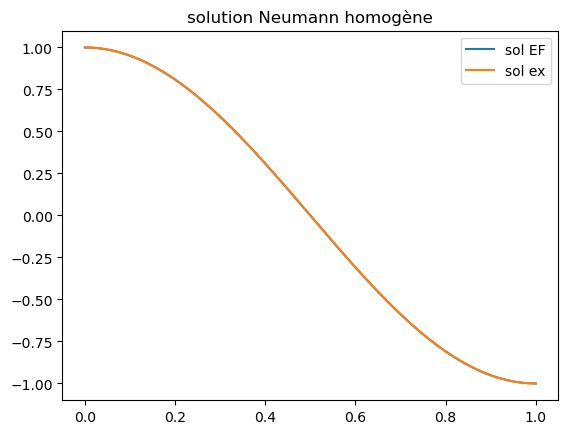

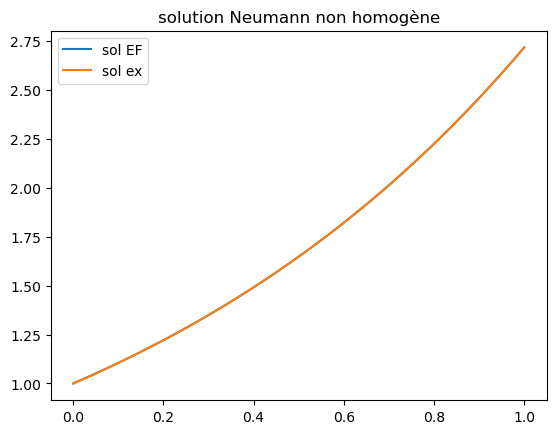

In [3]:
def Mneu(n):
    h=(b-a)/(n+1)
    M=(2*h/3)*np.eye(n+2)+(h/6)*np.eye(n+2,k=1)+(h/6)*np.eye(n+2,k=-1)
    M[0,0]/=2
    M[-1,-1]/=2
    return M

    
def Kneu(n):
    h=(b-a)/(n+1)
    K=(2/h)*np.eye(n+2)-(1/h)*np.eye(n+2,k=1)-(1/h)*np.eye(n+2,k=-1)
    K[0,0]/=2
    K[-1,-1]/=2
    return K
    
def F(f,n):
    h=(b-a)/(n+1)
    x=np.linspace(a,b,n+2)
    FF=h*f(x)
    FF[0]/=2
    FF[-1]/=2
    FF[0]+=-alpha
    FF[-1]+=beta
    return FF

# Cas homogène
    
a=0
b=1
    
N=499
h=(b-a)/(N+1)

c=2

alpha=0
beta=0


def fNh(x):
    return (2+np.pi**2)*np.cos(np.pi*x)

def uexNh(x):
    return np.cos(np.pi*x)


x=np.linspace(a,b,N+2)

A=Kneu(N)+c*Mneu(N)

FF=F(fNh,N)

u=np.linalg.solve(A,FF)

plt.figure(1)
plt.plot(x,u,label ='sol EF')
plt.plot(x,uexNh(x),label='sol ex')
plt.legend()
plt.title('solution Neumann homogène')

# Cas non homogène : u=e^x, -u''+2u=e^x

c=2

alpha=1
beta=np.exp(1)


def fN(x):
    return np.exp(x)

def uexN(x):
    return np.exp(x)

AN=Kneu(N)+c*Mneu(N)

FFN=F(fN,N)

uN=np.linalg.solve(AN,FFN)

plt.figure(2)
plt.plot(x,uN,label ='sol EF')
plt.plot(x,uexN(x),label='sol ex')
plt.legend()
plt.title('solution Neumann non homogène')


## III - Conditions aux limites mixtes.


Considérons maintenant le problème 

$$
({P_3})\left\{\begin{aligned}
&-u''(x)+u(x)=f(x),\ x\in ]a,b[,\\
&u(a)=0,\ u'(b)=\beta,
\end{aligned}
\right.
$$

avec $a,\ b\in\RR,\ \ \beta\in\RR$ et $f$ donnés.

**Question 1.** Écrire la formulation variationelle de $(P_3)$ dans l'espace 

$$ 
\tilde{V} = \left\{ v \in L^2(]a,b[)\,:\, v' \in L^2(]a,b[),\ 
v(a)=0 \right\}.
$$


Pour approcher le problème $(P_3)$ on considère, avec les mêmes notations qu'avant, l'espace 

$$ 
\tilde{V}_h \ = \left \{ v_h \in C^0([a,b])\,\,:\,\ v_h\ \textrm{est affine sur } {[x_i,x_{i+1}]}  \textrm{ et } v_h(a)=0 \right \}.
$$

L'espace $\tilde{V}_h$ est un espace de dimension finie $N+1$ dont une base est constituée des $N+1$ fonctions $\psi_i,$  $i=1,\dots,N+1,$ déjà définies avant.

**Question 2.** Re-écrire le problème variationnel discret associé à la formulation variationnelle de $(P_3)$. Ecrire un programme donnant la solution approchée de $(P_3)$ dans le cas $a=0,\ b=2\pi,\ \beta=2$, $f=2\sin(x)+x,$ pour lequel la solution exacte de $(P_3)$ est donnée par $u(x)=\sin(x)+x.$ 

**Question 3. Un dernier cas avec conditions de Robin.**

Considérons maintenant le problème 

$$
(\tilde{P_3})\left\{\begin{aligned}
&-u''(x)+u(x)=f(x),\ x\in ]0,1[,\\
&u(0)=0,\ u'(1)+u(1)=0.
\end{aligned}
\right.
$$

Vérifier que la formulation variationnelle de $\tilde{P_3}$ est la suivante : trouver $u\in V$ tel que 
$$
\int_0^1 (u'(x)v'(x)+u(x)v(x))\,dx + u(1)v(1)=\int_0^1 f(x)v(x)\,dx,\ \forall\ v\in\ \tilde{V},
$$

où $\tilde{V}$ est le même espace que dans la question 1.

Re-écrire à nouveau le problème variationnel discret associé à la formulation variationnelle de $(\tilde{P_3})$. Ecrire un programme donnant la solution approchée de $\tilde{P_3}$ dans le cas $f=(\pi^2+1)\sin(\pi x)+\frac{\pi}{2}x,$ pour lequel la solution exacte de $\tilde{P}$ est donnée par $u(x)=\sin(\pi x)+\frac{\pi}{2}x.$ 


Text(0.5, 1.0, 'Mixte Dirichet Robin')

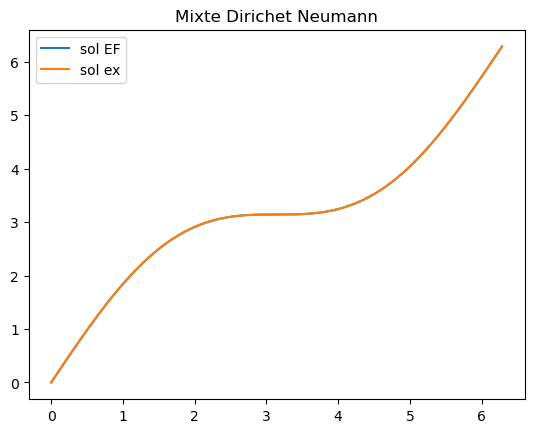

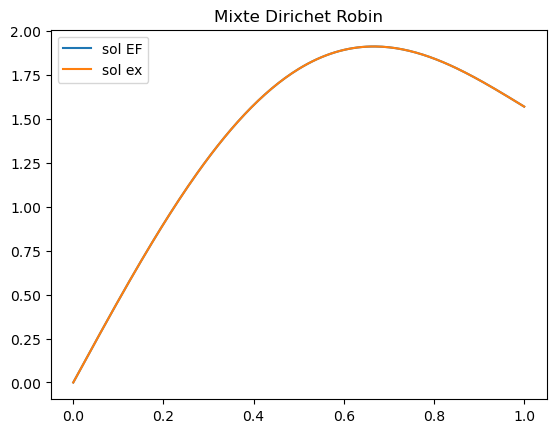

In [4]:
a=0
b=2*np.pi
beta=2

N=399
h=(b-a)/(N+1)

x=np.linspace(a,b,N+2)
xx=np.linspace(a+h,b,N+1)

def ff(x):
    return 2*np.sin(x)+x

def uuex(x):
    return np.sin(x)+x

M= (2*h/3)*np.eye(N+1)+(h/6)*np.eye(N+1,k=1)+(h/6)*np.eye(N+1,k=-1)
M[-1,-1]*=0.5

K=(2/h)*np.eye(N+1)-(1/h)*np.eye(N+1,k=1)-(1/h)*np.eye(N+1,k=-1)
K[-1,-1]*=0.5

F=h*ff(xx)    
F[-1]/=2
F[-1]+=beta

A=M+K

u=np.append(0,np.linalg.solve(A,F))

plt.figure(1)
plt.plot(x,u,label ='sol EF')
plt.plot(x,uuex(x),label='sol ex')
plt.legend()
plt.title('Mixte Dirichet Neumann')

#-----------------------------------------------------------------


a=0
b=1

N=199
h=(b-a)/(N+1)

x=np.linspace(a,b,N+2)
xx=np.linspace(a+h,b,N+1)


def ff(x):
    return (np.pi**2+1)*np.sin(np.pi*x)+np.pi*x/2

def uuex(x):
    return np.sin(np.pi*x)+np.pi*x/2

MM= (2*h/3)*np.eye(N+1)+(h/6)*np.eye(N+1,k=1)+(h/6)*np.eye(N+1,k=-1)
MM[-1,-1]*=0.5

KK=(2/h)*np.eye(N+1)-(1/h)*np.eye(N+1,k=1)-(1/h)*np.eye(N+1,k=-1)
KK[-1,-1]*=0.5

FF=h*ff(xx)    
FF[-1]/=2

AA=MM+KK
AA[-1,-1]+=1

uu=np.append(0,np.linalg.solve(AA,FF))

plt.figure(2)
plt.plot(x,uu,label ='sol EF')
plt.plot(x,uuex(x),label='sol ex')
plt.legend()
plt.title('Mixte Dirichet Robin')
